In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/UserSegmentation.csv")

In [ ]:
df

,Cus_ID,Sex,Age,Income,Rating
0,301219,M,23,306555,44
1,301220,F,26,306555,91
2,301221,F,24,326992,7
3,301222,M,28,326992,87
4,301223,F,38,347429,45
...,...,...,...,...,...
195,301414,F,42,2452440,89
196,301415,F,54,2575062,32
197,301416,M,39,2575062,83
198,301417,M,39,2799869,21


In [ ]:
features=['Income','Rating']

In [ ]:
#Dropping rows from the dataset which has NULL values
df = df.dropna(subset=features)

In [ ]:
data=df[features].copy()

In [ ]:
data

,Income,Rating
0,306555,44
1,306555,91
2,326992,7
3,326992,87
4,347429,45
...,...,...
195,2452440,89
196,2575062,32
197,2575062,83
198,2799869,21


In [ ]:
#1. Scale the data -- we want to treat all the rows equally while clustering the data
#2. Initialize random centroids
#3. Label each datapoint -- (each row in our data)
#4. Update centroids
#5. Repeat step 3 and step 4 until we get final centroids

In [ ]:
#Scaling the data
#MinMax Scaler
#Scaling on the range of 1-10
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

#First we set the minimum value of each column to zero
#Then we scaled it to range of 0 to 1
#Then, we scaled it to range of 0 to 9
#Then finally we scaled it to range of 1 to 10 by adding 1

In [ ]:
data.describe()

,Income,Rating
count,200.000000,200.000000
mean,4.360984,5.516927
std,1.937561,2.386273
min,1.000000,1.000000
25%,2.954918,4.116972
50%,4.430328,5.458716
75%,5.647541,7.605505
max,10.000000,10.000000


In [ ]:
#As we can see above minimum value in each column is 1 and maximum value in each column is 10
#Which means no one column will dominate the other columns in cluster

In [ ]:
data.head()

,Income,Rating
0,1.000000,4.467890
1,1.000000,8.348624
2,1.073770,1.412844
3,1.073770,8.018349
4,1.147541,4.550459


In [ ]:
#Initializing random centroids
#The number of centroids will be equal to the number of clusters k

def random_centroids(data,k):
  centroids=[]
  for i in range(k):
    centroid=data.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids,axis=1)

In [ ]:
centroids = random_centroids(data,5)

In [ ]:
centroids

,0,1,2,3,4
Income,8.745902,6.311475,3.065574,5.868852,2.770492
Rating,7.688073,9.091743,7.935780,3.807339,8.183486


In [ ]:
#Label each datapoint according to cluster centroids
#It will find euclidean distance between each datapoint and centroids and will find centroid which is closest to it

In [ ]:
#Finding distance
def get_labels(data,centroids):
  distances = centroids.apply(lambda x: np.sqrt(((data-x) ** 2).sum(axis=1)))
  return distances.idxmin(axis=1)

In [ ]:
labels = get_labels(data,centroids)

In [ ]:
labels

0      2
1      4
2      3
3      4
4      2
      ..
195    0
196    3
197    0
198    3
199    0
Length: 200, dtype: int64

In [ ]:
#Number of customers in each cluster
labels.value_counts()

3    94
2    47
1    33
4    20
0     6
dtype: int64

In [ ]:
#Updating the centroids
#Taking the geometric mean of all the values in a cluster
def new_centroids(data,labels,x):
  return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [ ]:
#Plotting cluster asignment in each steps
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
def plot_clusters(data,labels,centroids,iteration):
  pca=PCA(n_components=2)
  data_2d=pca.fit_transform(data)
  centroids_2d=pca.transform(centroids.T)

  clear_output(wait=True)
  plt.title(f'Iteration {iteration}')
  plt.scatter(x=data_2d[:,0] , y=data_2d[:,1] , c=labels)
  plt.scatter(x=centroids_2d[:,0] , y=centroids_2d[:,1])

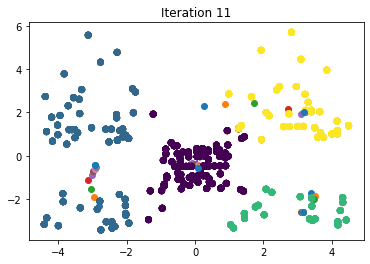

In [ ]:
max_iterations=100
k=4

centroids=random_centroids(data,k)
old_centroids=pd.DataFrame()
iteration=1

while iteration < max_iterations and not centroids.equals(old_centroids):
  old_centroids=centroids

  labels = get_labels(data,centroids)
  centroids = new_centroids(data,labels,k)
  plot_clusters(data,labels,centroids,iteration)
  iteration+=1

In [ ]:
centroids

,0,1,2,3
Income,3.815108,3.992372,1.672013,6.301541
Rating,5.444591,8.446859,2.417825,2.290954


In [ ]:
df[labels==0][["Age"]+features]

,Age,Income,Rating
124,28,1430590,33
128,71,1451027,13
130,57,1451027,11
134,24,1491901,6
136,53,1491901,8
138,23,1512338,12
140,69,1532775,6
144,30,1573649,14
146,58,1573649,41
148,41,1594086,25


In [ ]:
df[labels==1][["Age"]+features]

,Age,Income,Rating
1,26,306555,91
3,28,326992,87
5,27,347429,86
7,28,367866,106
9,36,388303,81
11,42,388303,111
13,29,408740,87
15,27,408740,89
19,42,470051,110
21,30,490488,82


In [ ]:
df[labels==2][["Age"]+features]

,Age,Income,Rating
17,24,429177,74
27,42,572236,69
40,78,776606,40
42,58,797043,41
43,38,797043,69
...,...,...,...
122,48,1410153,65
126,52,1451027,40
132,30,1471464,39
142,34,1553212,45


In [ ]:
#Comparing to scikitlearn
from  sklearn.cluster import KMeans

In [ ]:
kmeans=KMeans(4)
kmeans.fit(data)

KMeans(n_clusters=4)

In [ ]:
centroids = kmeans.cluster_centers_

In [ ]:
pd.DataFrame(centroids , columns=features).T

,0,1,2,3
Income,3.453607,6.311475,1.833927,6.277427
Rating,6.097798,2.601400,2.809334,8.465067
